# Roller Coaster

The goal of this project is visualizing data covering international roller coaster rankings and statistics.

Roller coasters are often split into two main categories based on their construction material: wood or steel. Rankings for the best wood and steel roller coasters from the 2013 to 2018 Golden Ticket Awards are provided in `Golden_Ticket_Award_Winners_Wood.csv` and `Golden_Ticket_Award_Winners_Steel.csv`, respectively.

## Tasks

### 1. Investigate

1.1.  Let's start by importing pandas and some other libraries, loading each CSV into a DataFrame and inspecting it to gain familiarity with the data.

In [65]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np

In [66]:
roller_coast_wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
roller_coast_steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
roller_coast_list = pd.read_csv('roller_coasters.csv')


From documentation we got the following info about columns in the **"Golden Ticket Awards"** datasets: 

- `Rank:` rank of the roller coaster in a given year;
- `Name:` name of the roller coaster;
- `Park:` amusement park where the roller coaster is located;
- `Location:` location of the amusement park where the roller coaster is located;
- `Supplier:` manufacturer of the roller coaster;
- `Year Built:` year the roller coaster was built;
- `Points:` points scored in a given year’s ranking;
- `Year of Rank:` year the roller coaster achieved a given rank.

1.2. Let's check out wooden roller coasters.

In [67]:
roller_coast_wood

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013
...,...,...,...,...,...,...,...,...
175,46,Megafobia,Oakwood,"Pembrookshire, Wales",Custom Coasters,1996,84,2018
176,47,Hades 360,Mount Olympus,"Wisconsin Dells, Wis.",Gravity Group,2005,80,2018
177,48,Mine Blower,Fun Spot,"Kissimmee, Fla.",Gravity Group,2017,79,2018
178,49,Wooden Warrior,Quassy Amusement Park,"Meddlebury, Conn.",Gravity Group,2011,77,2018


1.3. Now the data types of the wooden roller coaster dataset.

In [68]:
roller_coast_wood.dtypes

Rank             int64
Name            object
Park            object
Location        object
Supplier        object
Year Built       int64
Points           int64
Year of Rank     int64
dtype: object

1.4. Same operations we should perform for steel roller coasters. 

In [69]:
roller_coast_steel

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo's Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013
...,...,...,...,...,...,...,...,...
175,46,Expedition Everest,Disney's Animal Kingdom,"Orlando, Fla.",Vekoma,2006,82,2018
176,47,Storm Chaser,Kentucky Kingdom,"Louisville, Ky.",Rocky Mountain,2016,81,2018
177,48,Raging Bull,Six Flags Great America,"Gurnee, Ill.",B&M,1999,78,2018
178,49,Thunderbird,Holiday World,"Santa Claus, Ind.",B&M,2015,72,2018


In [70]:
roller_coast_steel.dtypes

Rank             int64
Name            object
Park            object
Location        object
Supplier        object
Year Built       int64
Points           int64
Year of Rank     int64
dtype: object

Information seems to be in the proper place at least at the first glance. Data types seem to be ok for our purposes.

1.5. As the next step, we are going to give answers to several questions:
- How many roller coasters are included in each ranking dataset? 
- How many different roller coaster suppliers are included in the rankings? 
- Do some years include more rankings than other years?

1.6. Let's start from the 1st one: how many roller coasters we have? We are going to include only unique rows from the datasets. 

In [71]:
len(roller_coast_wood.Name.unique())

61

In [72]:
len(roller_coast_steel.Name.unique())

63

- 61 of Wood
- 63 of Steel 

1.7. How many unique suppliers there are? 

In [73]:
len(roller_coast_wood.Supplier.unique())

33

In [74]:
len(roller_coast_steel.Supplier.unique())

15

- 33 for wooden equipment
- 15 for steel

1.8. Do some years include more rankings than others?

In [75]:
roller_coast_wood.groupby('Year of Rank').Rank.count().reset_index()

,Year of Rank,Rank
0,2013,10
1,2014,10
2,2015,10
3,2016,50
4,2017,50
5,2018,50


Basically yes,  from 2016 they started to rate 5 times more roller coasters per year, both wooden and steel. 

In [76]:
roller_coast_steel.groupby('Year of Rank').Rank.count().reset_index()

,Year of Rank,Rank
0,2013,10
1,2014,10
2,2015,10
3,2016,50
4,2017,50
5,2018,50


1.9. Let's check whether there are ranked roller coasters in Sweden.

In [77]:
def rl_bylocation(location, dataset):
    filtered = dataset[dataset['Location'].str.contains(location)]
    return filtered.groupby(['Name', 'Location']).size().reset_index(name= 'Count')

In [78]:
rl_bylocation('Sweden', roller_coast_steel)

,Name,Location,Count
0,Helix,"Gothenburg, Sweden",3
1,Jetline,"Stockholm, Sweden",1
2,Lisebergbanan,"Gothemburg, Sweden",1
3,Lisebergbanan,"Gothenburg, Sweden",2


There is a typo in the name "Gothenburg", let's fix it. 

In [79]:
roller_coast_steel.Location = roller_coast_steel.Location.replace('Gothemburg', 'Gothenburg', regex=True)

Checking the results.

In [80]:
rl_bylocation('Sweden', roller_coast_steel)

,Name,Location,Count
0,Helix,"Gothenburg, Sweden",3
1,Jetline,"Stockholm, Sweden",1
2,Lisebergbanan,"Gothenburg, Sweden",3


Now we check out wooden roller coasters.

In [81]:
rl_bylocation('Sweden', roller_coast_wood)

,Name,Location,Count
0,Balder,"Gothenburg, Sweden",4
1,Twister,"Stockholm, Sweden",2
2,Wildfire,"Norrköping, Sweden",3


There are 6 roller coasters across Sweden:
- 3 steel; 
- 3 wooden;
- 2 in the Stockholm area, where I live.

### 2.  Visualisation Functions

#### 2.1. Ranking of 1 

2.1.1. Let's write a function that will plot the ranking of a given roller coaster over time as a line. 

In [82]:
def visualise_r_coaster(dataset, roller_coast_name, location):
    # Prepare grid
    plt.figure(figsize = (16,9))
    sns.set(style='darkgrid',)

    # Filter dataset
    rcoaster_by_name_loc = dataset[(dataset.Name == roller_coast_name) & (dataset.Location == location)]
    # Plot lines
    axes = sns.lineplot(data = rcoaster_by_name_loc, x = 'Year of Rank', y = 'Rank', marker = "o")

    # Invert y values
    axes.invert_yaxis()
    # Add descriptions
    plt.xlabel('Years', fontsize=13)
    plt.ylabel('Rank', fontsize=13)
    plt.title('Roller Coaster\'s rank changes over years', fontsize=14)
    return plt.show()

2.1.2. Let's check it on **"El Toro"** in Jackson N.J.

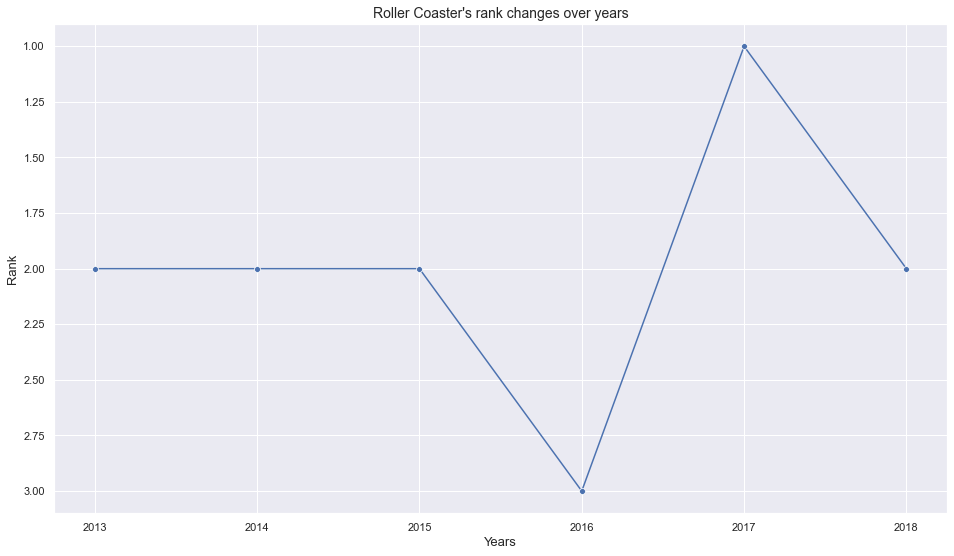

In [83]:
# Call function
visualise_r_coaster(roller_coast_wood, 'El Toro', 'Jackson, N.J.')

Considering that Rank has an inverted scale (1 is the best result), we have inverted our y values accordingly. 


#### 2.2. Ranking of 2 or more 

2.2.1. Now let's write a function that will plot the ranking of two given roller coasters over time as lines. We are going to take the most popular names of the roller coasters: **'El Toro'** and **'Boulder Dash'**.

In [84]:
names_list = ['El Toro', 'Boulder Dash'] 

2.2.2. Let's check what locations we have to specify them for the function. 

In [85]:
roller_coast_wood[roller_coast_wood.Name.isin(names_list)]

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
10,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1480,2014
11,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1291,2014
20,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1625,2015
21,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1464,2015
30,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",Custom Coasters,2000,1216,2016
32,3,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1121,2016
55,25,El Toro,Freitzeitpark Plohn,"Legendfeld, Germany",Great Coasters Int.,2009,166,2016
80,1,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2009,1241,2017


2.2.3. We can go with **'Jackson, N.J.'** and **'Bristol, Conn.'**

In [86]:
locations_list = ['Jackson, N.J.', 'Bristol, Conn.']

2.2.4. Now the function.

In [87]:
def visualise_r_coasters(dataset, names_list, locations_list):
    # Prepare grid
    plt.figure(figsize = (16,9))
    sns.set(style='darkgrid',)

    # Palette set up
    colors = sns.color_palette("husl", 9)
    customPalette = sns.set_palette(sns.color_palette(colors))

    # Filter dataset
    rcoaster_by_name_loc = dataset[(dataset.Name.isin(names_list)) & (dataset.Location.isin(locations_list))]
    # Plot lines
    axes = sns.lineplot(data = rcoaster_by_name_loc, x = 'Year of Rank', y = 'Rank', hue= 'Location', style= 'Name', palette = customPalette, markers=True)
    
    # Invert y values
    axes.invert_yaxis()
    # Add descriptions
    plt.xlabel('Years', fontsize=13)
    plt.ylabel('Rank', fontsize=13)
    plt.title('Roller Coaster\'s rank changes over years', fontsize=14)
    return plt.show()


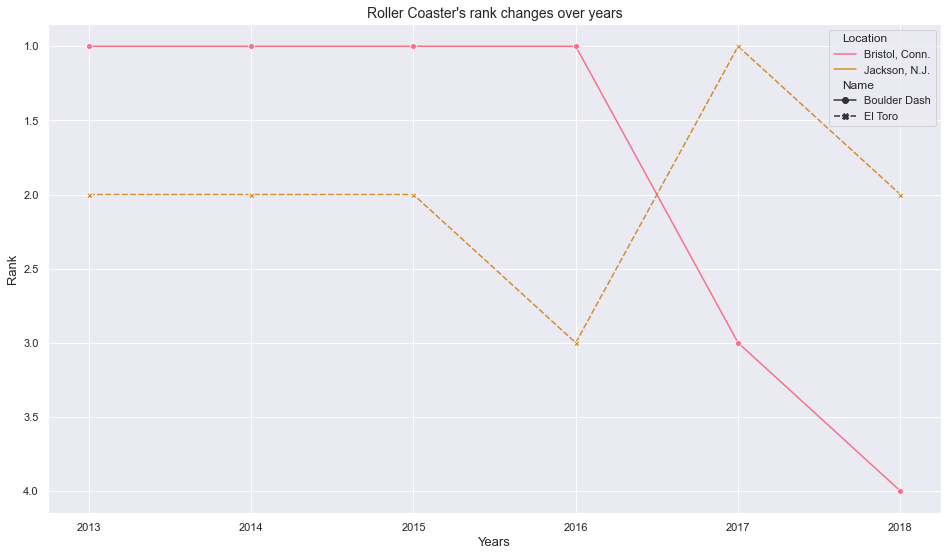

In [88]:
# Call function
visualise_r_coasters(roller_coast_wood, names_list, locations_list)

We can also add **"El Toro"** park in Germany to at least explore the possibility.

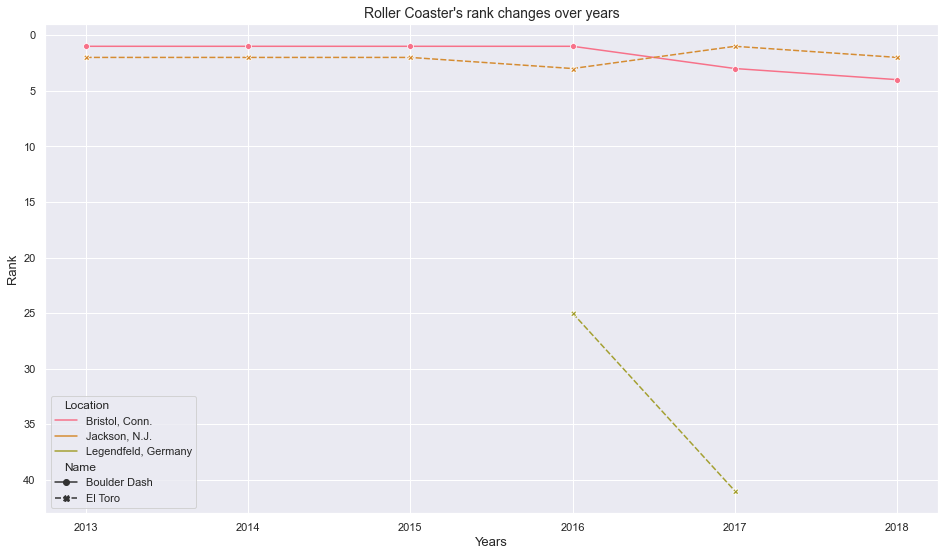

In [89]:
locations_list = ['Jackson, N.J.', 'Bristol, Conn.', 'Legendfeld, Germany']
visualise_r_coasters(roller_coast_wood, names_list, locations_list)

We have to admit that the last german coaster looks a bit out of place here without normalisation. Though normalisation is not a good variant if we want to see actual Ranks. Let's try to filter coasters with similar ranks to have a better understanding of the Rank fluctuations.

#### 2.3. Ranking of top `n`
Now we are going to write a function that will plot the ranking of the top `n` ranked roller coasters over time as lines. Due to the fact that several roller coasters can have the same Rank, but in different years we'll see more than exactly `n` coasters on the graph. 

2.3.1. So let's check how many roller coasters we should display on the graph, just in case. 

In [90]:
roller_coast_steel[roller_coast_steel.Rank <= 5]

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo's Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013
10,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1139,2014
11,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1049,2014
12,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,764,2014
13,4,Diamondback,Kings Island,"Mason, Ohio",B&M,2009,579,2014
14,5,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,563,2014


There are many locations and roller coasters here, there is a chance that it will look messy on the graph, but let's give it a chance. 

2.3.2. Now we are going to write the function. 

In [91]:
def visualise_top_n(dataset, n):
    # Prepare grid
    plt.figure(figsize = (16,9))
    sns.set(style='darkgrid',)

    # Palette set up
    colors = sns.color_palette("colorblind")
    customPalette = sns.set_palette(sns.color_palette(colors))

    # Filter dataset
    rcoaster_by_rank = dataset[dataset.Rank <= n]
    # Plot lines
    axes = sns.lineplot(
        data=rcoaster_by_rank,
        x='Year of Rank',
        y='Rank',
        hue='Location',
        style='Name',
        palette=(customPalette),
        markers=True,
        markersize=20,
        dashes=False,
        linewidth=1,
    )
    
    # Invert y values
    axes.invert_yaxis()
    # Add descriptions
    plt.xlabel('Years', fontsize='large')
    plt.ylabel('Rank', fontsize='large')
    plt.title('Roller Coaster\'s rank changes over years', fontsize='x-large')
    
    # Add legend
    leg = plt.legend(
        loc='upper right', 
        bbox_to_anchor=(1.19, 1, 0.04, 0.01), 
        fontsize='large', 
        markerscale=2.5 
        )
    # Set up line width for legend
    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)

    return plt.show()
    

We had to tweak many parameters to get markers and colours as distinctive as possible.

2.3.3. Let's visualise coasters with the Rank 5 and higher in different places. 

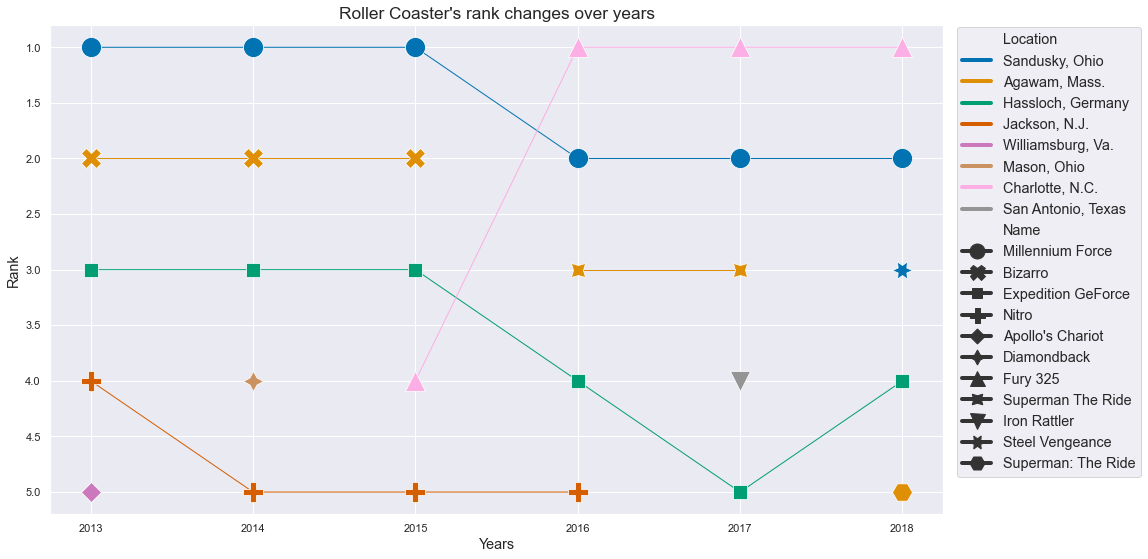

In [92]:
visualise_top_n(roller_coast_steel, 5)

2.3.4. We have 2 **'Superman: The Ride'** with and without colon at the same location on our current plot, let's fix it and call the function again.

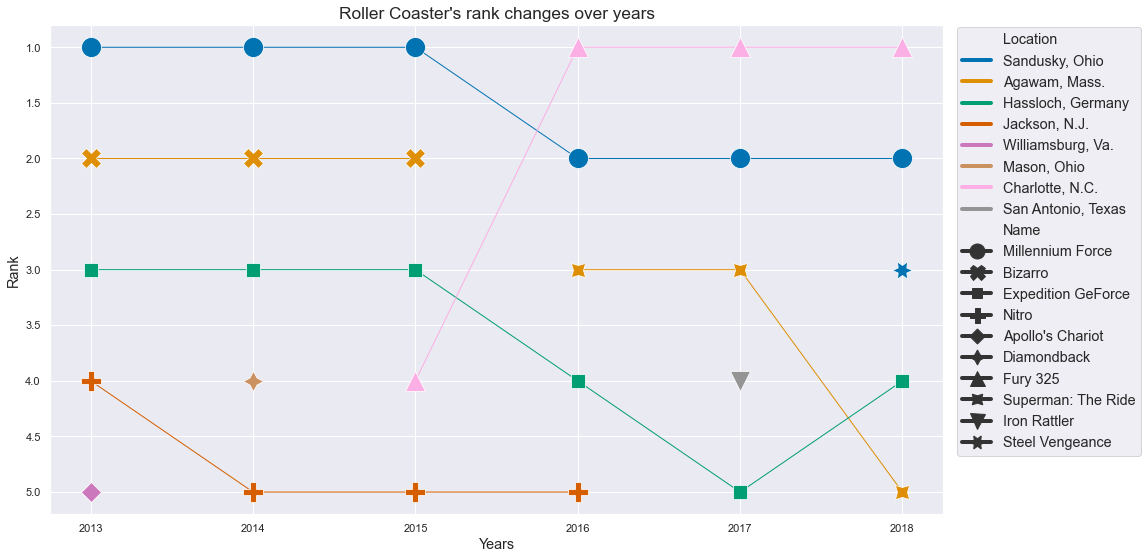

In [93]:
# Add a colon to all data points with such name
roller_coast_steel.Name = roller_coast_steel.Name.replace('Superman The Ride', 'Superman: The Ride', regex=True)
# Call function
visualise_top_n(roller_coast_steel, 5)

Summary (steel roller coasters): 

- 9 out of 10 roller coasters with the best Ranks are located in the **US**. 
- The only exception is *`"Expedition GeForce"`* located in **Hassloch, Germany**, with a Ranks of around 3-5 over the period from 2013 to 2018.
- The best steel roller coaster over the period from 2016 to 2018 is *`"Fury 325"`* and it's located in **Charlotte, N.C**. It is also unique in its impressive Rank leap from the 4th in 2015 to the 1st in 2016.
- Fair share of success has *`"Millennium Force"`* in **Sandusky, Ohio**. It had been an absolute leader in 2013-2015 before it was shifted to Rank 2 in 2016-2018. 
- *`"Bizzaro"`*, located in **Agawam, Massachusetts**, with its firm Rank 2 in 2013-15 vanished from the leaderboard afterwards.
- *`"Superman: The Ride"`* also in **Agawam, Massachusetts**. had been having Rank 3 in 2016-2017 but was shifted to Rank 5 in the next year. 
- *`"Steel Vengeance"`* also located in **Sandusky, Ohio**, had managed to sparkle once on the 3d Rank in 2018 before data in this set ran out. 
- *`"Diamondback"`* and *`"Iron Rattler"`* in **Mason, Ohio** and **San Antonio, Texas**, respectively, appeared once on the Rank 4. 
- *`"Nitro"`* in *Jackson, N.J.*, had been having Ranks 4-5 during years 2013-2016, but then also vanished from the leader board. 
- *`"Apollo's Chariot"`* in **Williamsburg, Virginia**, got itself Rank 5 in 2013 and then had been shifted from the leaderboard below.

2.3.5. Let's check the wooden coasters. 

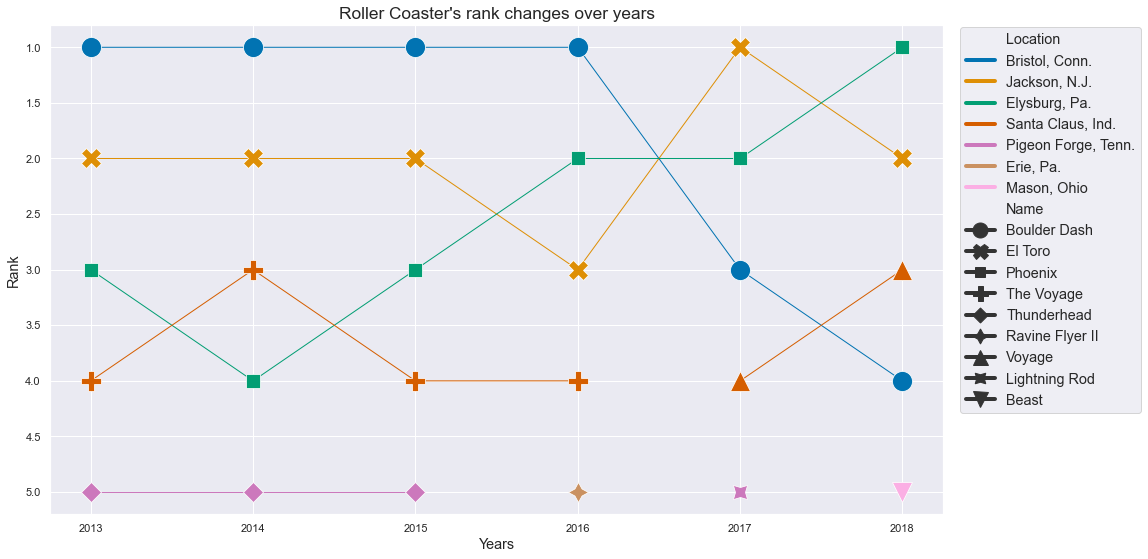

In [94]:
# Call function
visualise_top_n(roller_coast_wood, 5)

2.3.6. Let's also correct duplicates with and without "the" for the roller coaster with the name "Voyage".

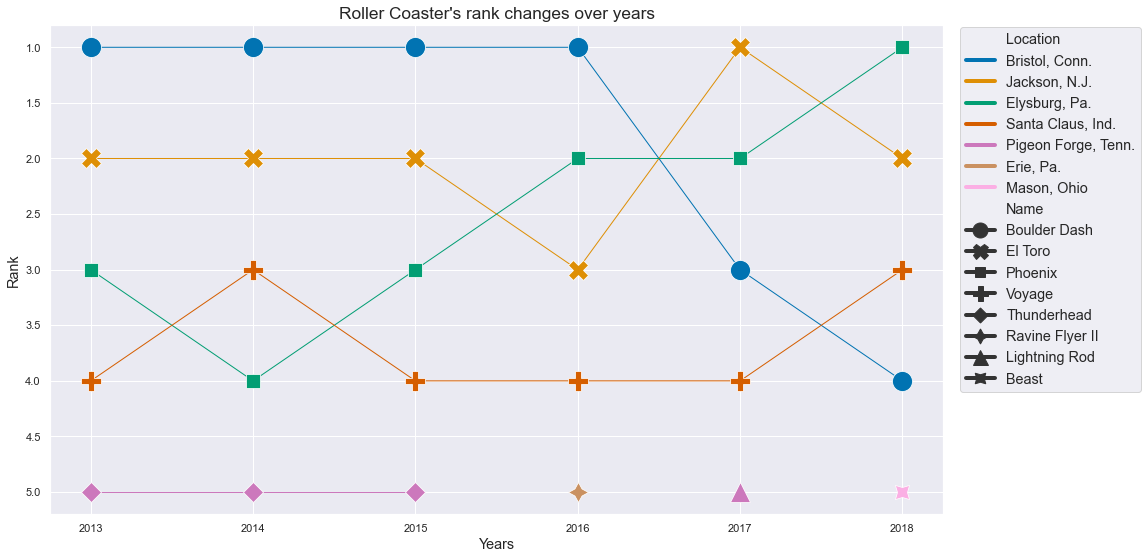

In [95]:
roller_coast_wood.Name = roller_coast_wood.Name.replace('The Voyage', 'Voyage', regex=True)
# Call function
visualise_top_n(roller_coast_wood, 5)

Summary (wooden roller coasters): 

- Wooden roller coasters with the highest Ranks are located exceptionally in the **US**, at least according to this dataset.
- *`"Boulder Dash"`* in **Bristol, Connecticut**, have been getting Rank 1 during years 2013-2016 but then had been lowered to the Rank 3 in the 2017th and to Rank 4th year after.
- Not so dramatic but also a bumpy path of success has *`"El Toro"`*, located in **Jackson, N.J.**: from Rank 1 in 2013-2015 through 4th and 1st and then back to the 2nd Rank in 2018. 
- *`"Phoenix"`* in **Elysburg, Pennsylvania**, had been getting success step by step from Rank 3 in 2013 to the 1st in 2018.
- *`"Voyage"`* in **Santa Claus, Indiana**, had been having Ranks 3-4 over years 2013-2018. 
- *`"Thunderhead"`* in **Pigeon Forge, Tennessee**, *`"Ravine Flyer II"`* in **Erie, Pennsylvania**, *`"Lightning Rod"`* also located in **Pigeon Forge** and *`"Beast"`* in **Mason, Ohio**, have been getting Rank 5 in different years from 2013 to 2018. 